In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('/Users/wangning/Desktop/cornell_repos/Bloom-Filter-Carbon-Footprint/emissions_gpu.csv')
df2=pd.read_csv('/Users/wangning/Desktop/cornell_repos/Bloom-Filter-Carbon-Footprint/emissions_data_method_gpu.csv')
df3=pd.read_csv('/Users/wangning/Desktop/cornell_repos/Bloom-Filter-Carbon-Footprint/emissions_ada_gpu.csv')
df4=pd.read_csv('/Users/wangning/Desktop/cornell_repos/Bloom-Filter-Carbon-Footprint/emissions_data_method_gpu_ada.csv')

In [3]:
df4['method']='normal_ada_bf'

In [4]:
## drop the testing row
df1_edit=pd.concat([df1.iloc[1:], df3], ignore_index=True)
len(df1_edit)

800

In [5]:
df2_edit=pd.concat([df2, df4], ignore_index=True)
len(df2_edit)

800

In [6]:
df1_edit.head()

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
0,2023-11-10T02:50:35,codecarbon,a38f6ca9-53c9-4b11-a071-fe9c52d360f5,0.006858,3.809221e-08,0.000006,42.5,0.000000,4.754379,8.006874e-08,...,2,Intel(R) Xeon(R) CPU @ 2.30GHz,1,1 x Tesla T4,-95.8517,41.2591,12.678345,machine,N,1.0
1,2023-11-10T02:50:36,codecarbon,17da7cce-299d-4f64-b7a0-5dd0b1293eee,0.008400,1.697138e-07,0.000020,42.5,252.951534,4.754379,9.806007e-08,...,2,Intel(R) Xeon(R) CPU @ 2.30GHz,1,1 x Tesla T4,-95.8517,41.2591,12.678345,machine,N,1.0
2,2023-11-10T02:50:38,codecarbon,b84f587b-8c5c-4d8d-bbda-063504c1c5c8,0.007191,4.002099e-08,0.000006,42.5,0.000000,4.754379,8.391920e-08,...,2,Intel(R) Xeon(R) CPU @ 2.30GHz,1,1 x Tesla T4,-95.8517,41.2591,12.678345,machine,N,1.0
3,2023-11-10T02:50:40,codecarbon,b72582bc-ee84-49b1-9278-c8fce0a839fb,0.007439,4.117396e-08,0.000006,42.5,0.000000,4.754379,8.613716e-08,...,2,Intel(R) Xeon(R) CPU @ 2.30GHz,1,1 x Tesla T4,-95.8517,41.2591,12.678345,machine,N,1.0
4,2023-11-10T02:50:44,codecarbon,35820c19-2b79-4dc7-a1fc-dbaedb1f72c4,0.018979,2.343006e-07,0.000012,42.5,84.299724,4.754379,2.225161e-07,...,2,Intel(R) Xeon(R) CPU @ 2.30GHz,1,1 x Tesla T4,-95.8517,41.2591,12.678345,machine,N,1.0


In [7]:
df2_edit.head()

,time,electricity,power,method
0,0.013768,3.809221e-08,0.000003,bloom_filter
1,0.015283,1.697138e-07,0.000011,bloom_filter
2,0.014129,4.002099e-08,0.000003,bloom_filter
3,0.029902,4.117396e-08,0.000001,bloom_filter
4,0.059650,2.343006e-07,0.000004,bloom_filter


In [8]:
df_merged = pd.merge(df1_edit, df2_edit, left_index=True, right_index=True)

df_merged.head()

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue,time,electricity,power,method
0,2023-11-10T02:50:35,codecarbon,a38f6ca9-53c9-4b11-a071-fe9c52d360f5,0.006858,3.809221e-08,0.000006,42.5,0.000000,4.754379,8.006874e-08,...,-95.8517,41.2591,12.678345,machine,N,1.0,0.013768,3.809221e-08,0.000003,bloom_filter
1,2023-11-10T02:50:36,codecarbon,17da7cce-299d-4f64-b7a0-5dd0b1293eee,0.008400,1.697138e-07,0.000020,42.5,252.951534,4.754379,9.806007e-08,...,-95.8517,41.2591,12.678345,machine,N,1.0,0.015283,1.697138e-07,0.000011,bloom_filter
2,2023-11-10T02:50:38,codecarbon,b84f587b-8c5c-4d8d-bbda-063504c1c5c8,0.007191,4.002099e-08,0.000006,42.5,0.000000,4.754379,8.391920e-08,...,-95.8517,41.2591,12.678345,machine,N,1.0,0.014129,4.002099e-08,0.000003,bloom_filter
3,2023-11-10T02:50:40,codecarbon,b72582bc-ee84-49b1-9278-c8fce0a839fb,0.007439,4.117396e-08,0.000006,42.5,0.000000,4.754379,8.613716e-08,...,-95.8517,41.2591,12.678345,machine,N,1.0,0.029902,4.117396e-08,0.000001,bloom_filter
4,2023-11-10T02:50:44,codecarbon,35820c19-2b79-4dc7-a1fc-dbaedb1f72c4,0.018979,2.343006e-07,0.000012,42.5,84.299724,4.754379,2.225161e-07,...,-95.8517,41.2591,12.678345,machine,N,1.0,0.059650,2.343006e-07,0.000004,bloom_filter


In [9]:
df_merged.describe()

,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,...,cloud_region,cpu_count,gpu_count,longitude,latitude,ram_total_size,pue,time,electricity,power
count,800.000000,8.000000e+02,800.000000,800.0,800.000000,800.000000,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,...,0.0,800.0,800.0,800.000000,800.000000,800.000000,800.0,800.000000,8.000000e+02,8.000000e+02
mean,0.007274,4.397402e-08,0.000006,42.5,11.384395,4.754379,8.486399e-08,1.336807e-08,4.302859e-09,1.025349e-07,...,NaN,2.0,1.0,-100.667875,39.986450,12.678343,1.0,0.025505,4.397402e-08,1.873132e-06
std,0.001219,2.879217e-08,0.000004,0.0,51.472500,0.000001,1.432884e-08,5.912036e-08,1.268982e-09,6.329254e-08,...,NaN,0.0,0.0,8.347078,2.205673,0.000003,0.0,0.009749,2.879217e-08,1.354149e-06
min,0.006010,2.657771e-08,0.000004,42.5,0.000000,4.754376,7.006261e-08,0.000000e+00,3.117527e-09,7.319305e-08,...,NaN,2.0,1.0,-115.116400,36.168500,12.678337,1.0,0.013511,2.657771e-08,6.521473e-07
25%,0.006923,3.684704e-08,0.000005,42.5,0.000000,4.754379,8.082518e-08,0.000000e+00,4.071743e-09,8.506183e-08,...,NaN,2.0,1.0,-100.667875,39.986450,12.678343,1.0,0.018979,3.684704e-08,1.322602e-06
50%,0.007058,3.862712e-08,0.000006,42.5,0.000000,4.754379,8.233736e-08,0.000000e+00,4.120546e-09,8.671923e-08,...,NaN,2.0,1.0,-95.851700,41.259100,12.678345,1.0,0.022844,3.862712e-08,1.582495e-06
75%,0.007277,3.985955e-08,0.000006,42.5,0.000000,4.754379,8.476430e-08,0.000000e+00,4.180214e-09,8.961253e-08,...,NaN,2.0,1.0,-95.851700,41.259100,12.678345,1.0,0.030250,3.985955e-08,1.932036e-06
max,0.029377,2.979163e-07,0.000027,42.5,281.354805,4.754379,3.454859e-07,2.930558e-07,3.299461e-08,6.582030e-07,...,NaN,2.0,1.0,-95.851700,41.259100,12.678345,1.0,0.098130,2.979163e-07,1.194210e-05


In [10]:
def get_plots(df,col,group='method'):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue=group, element="step", kde=True)
    plt.title('Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.show()
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=group, y=col)
    plt.title('Boxplot of emission rate by method')
    plt.xlabel(group)
    plt.ylabel(col)
    plt.show()

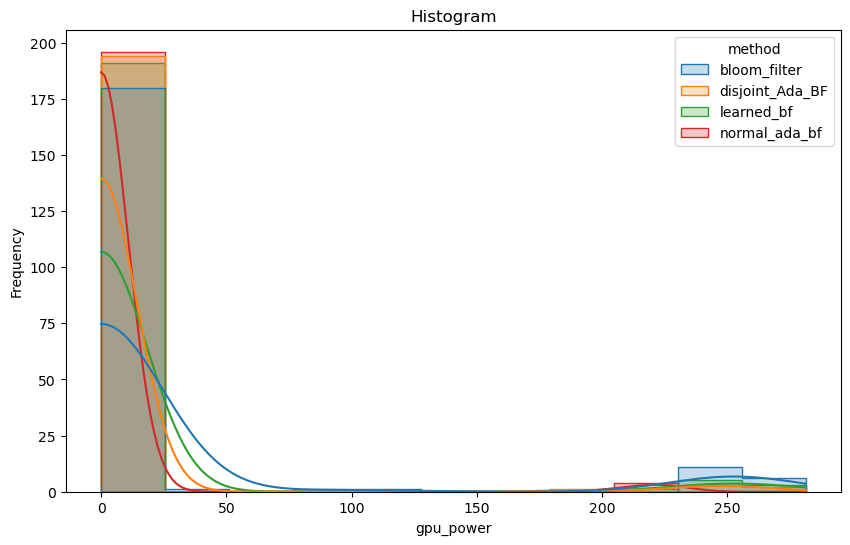

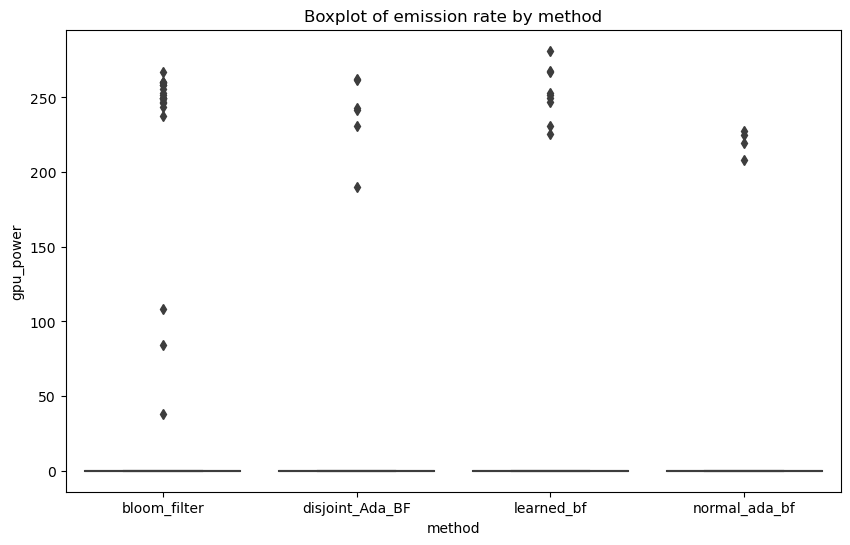

In [11]:
get_plots(df_merged,'gpu_power')

In [12]:
df_merged['ram_power']

0      4.754379
1      4.754379
2      4.754379
3      4.754379
4      4.754379
         ...   
795    4.754376
796    4.754376
797    4.754376
798    4.754376
799    4.754376
Name: ram_power, Length: 800, dtype: float64

In [13]:
cols=[ 'emissions','emissions_rate', 'cpu_power', 'gpu_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'energy_consumed']

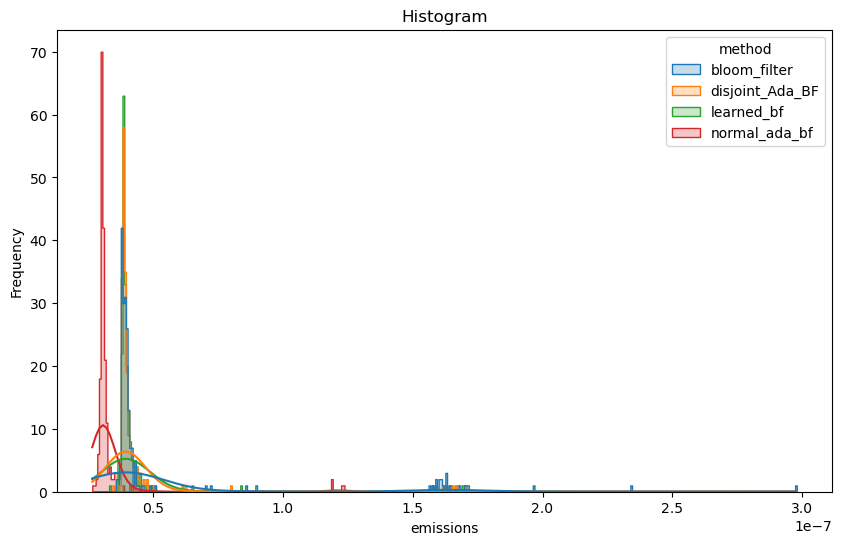

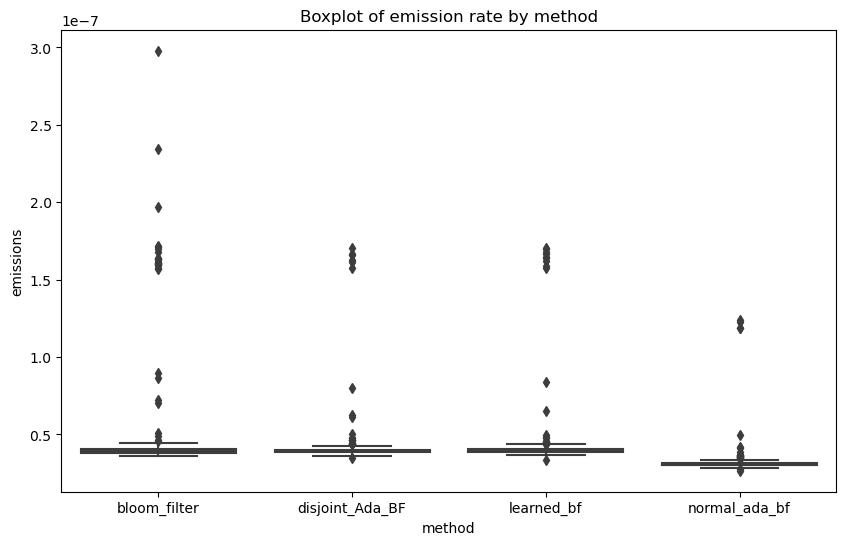

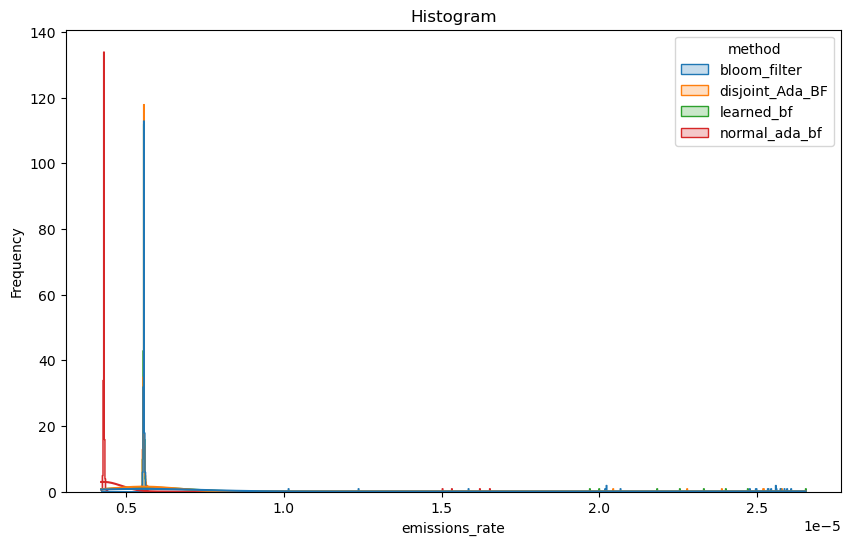

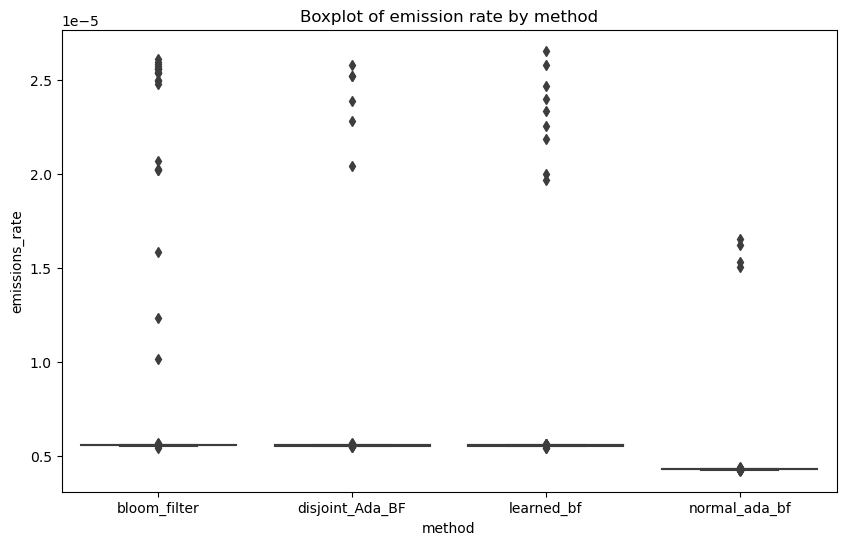

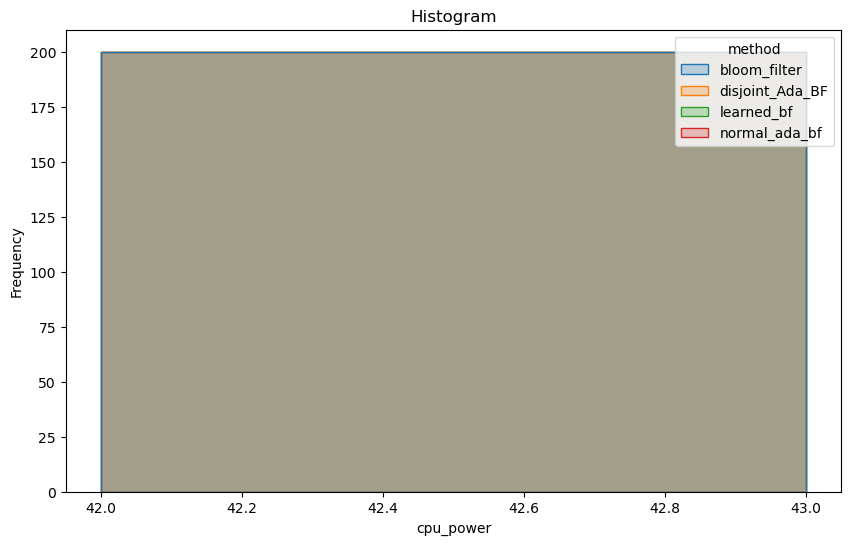

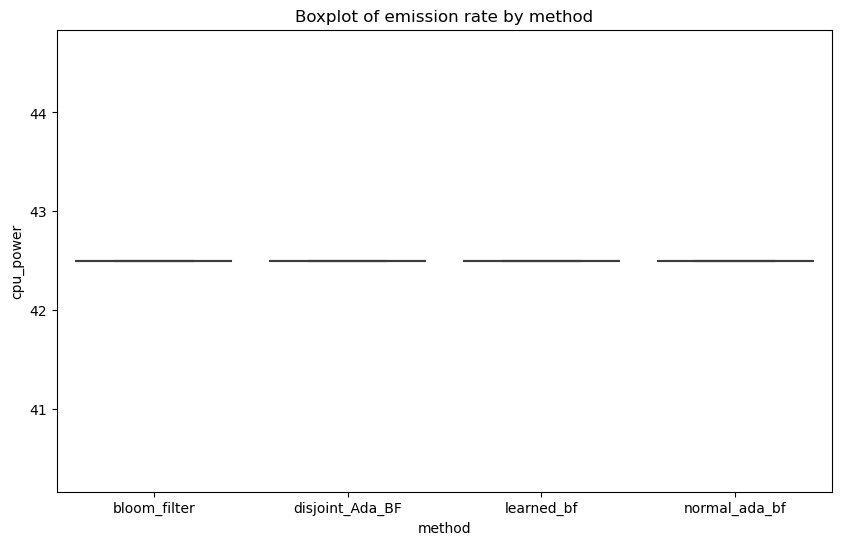

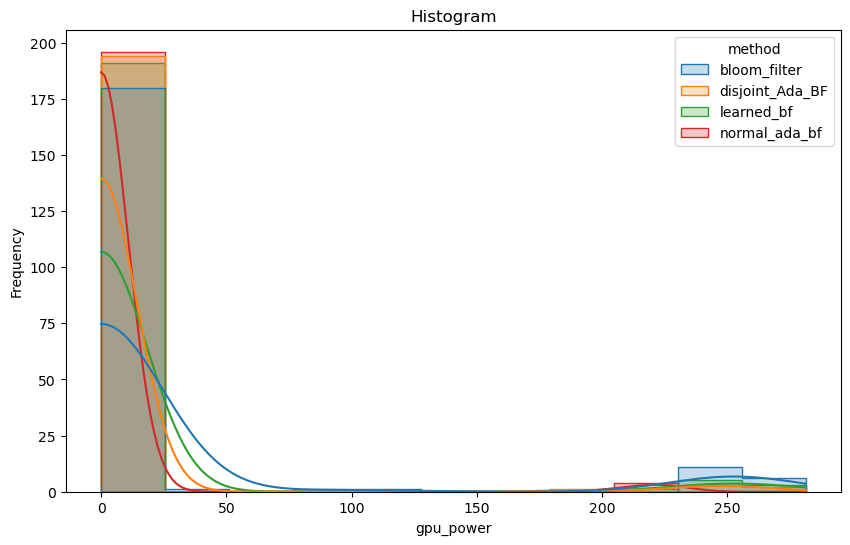

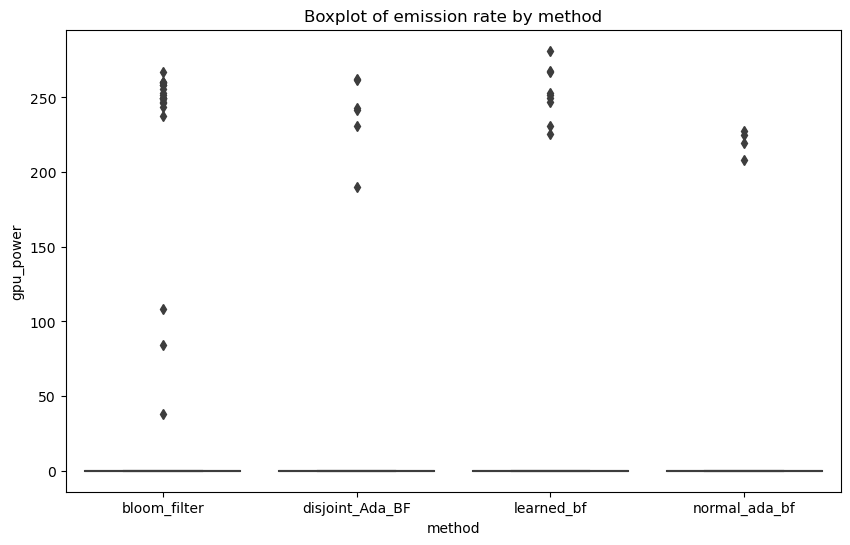

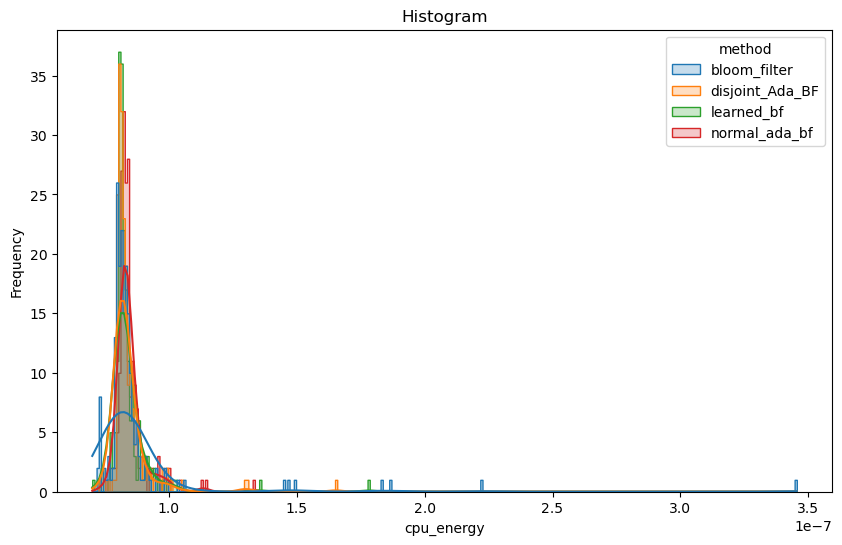

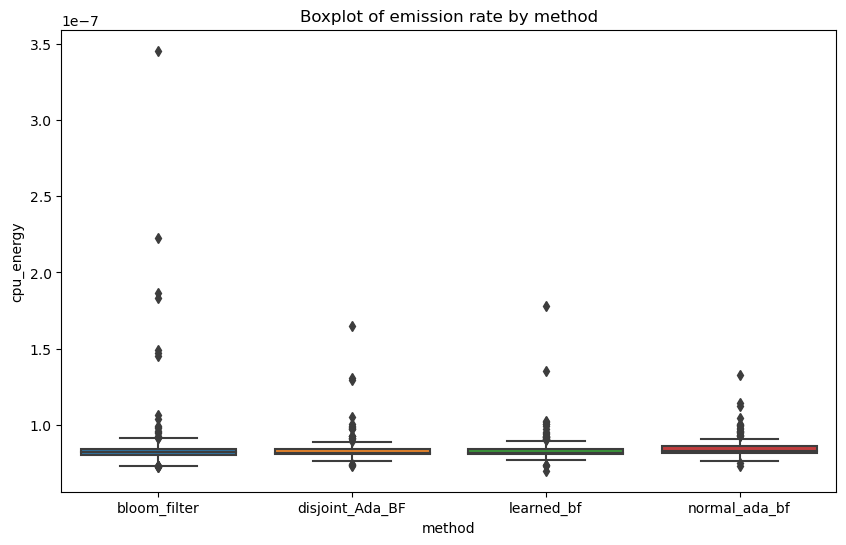

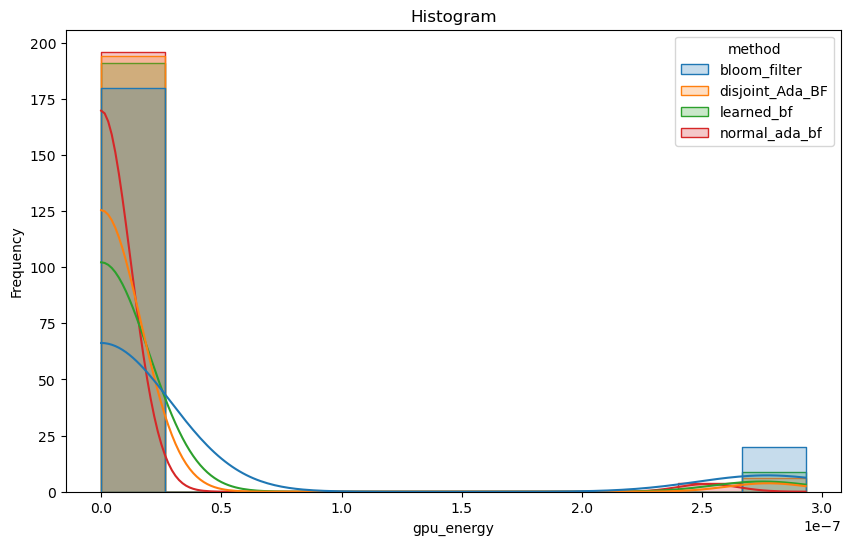

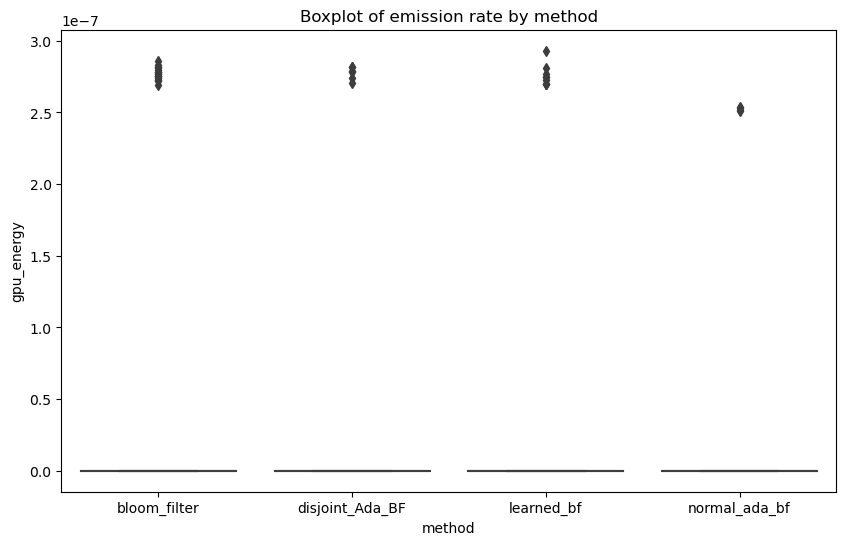

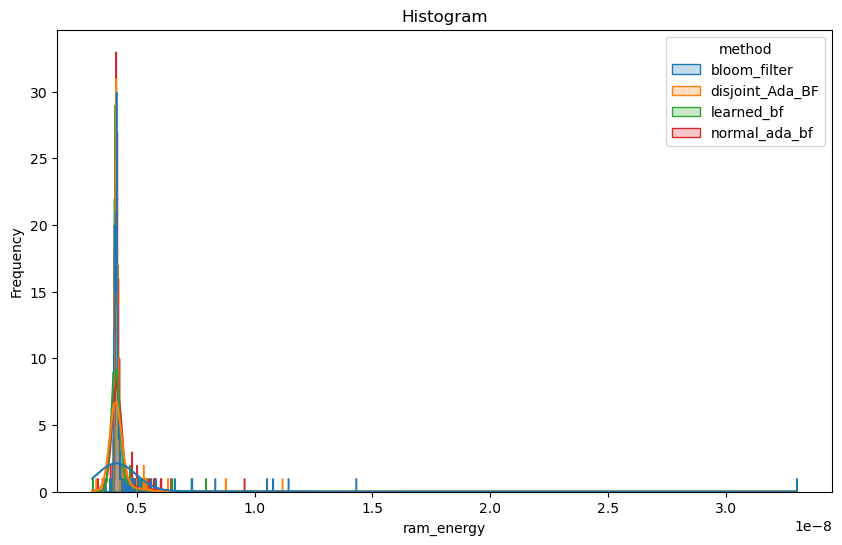

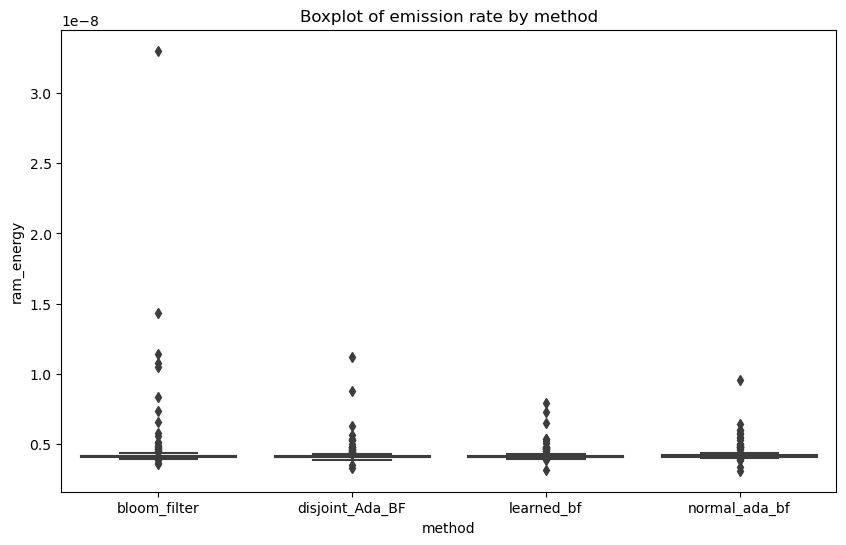

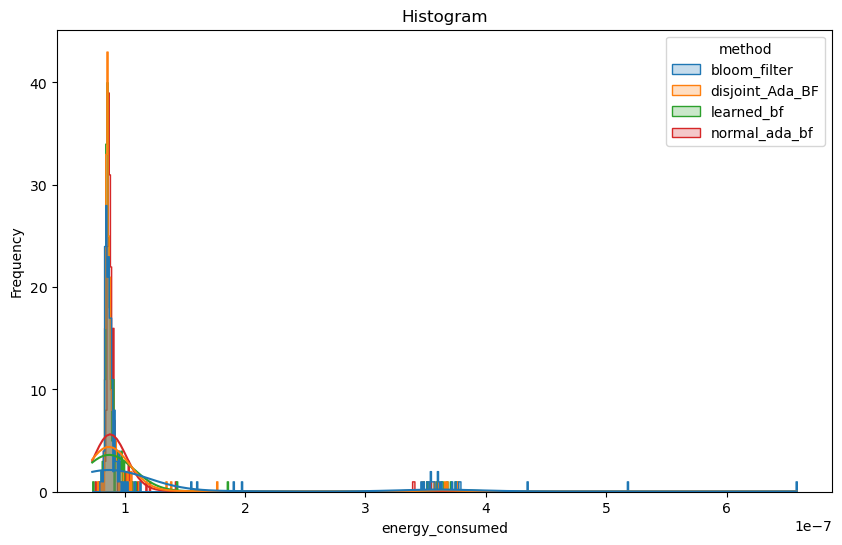

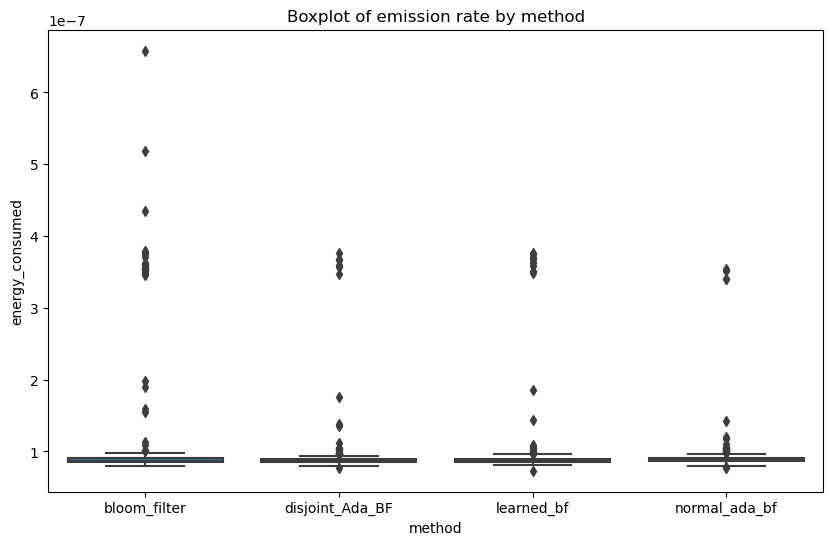

In [14]:
for col in cols:
    get_plots(df_merged,col)
    

In [15]:
def get_scatterplot(df,x,y,group='method'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue=group)
    plt.title('Scatter plot')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title=group)
    plt.show()

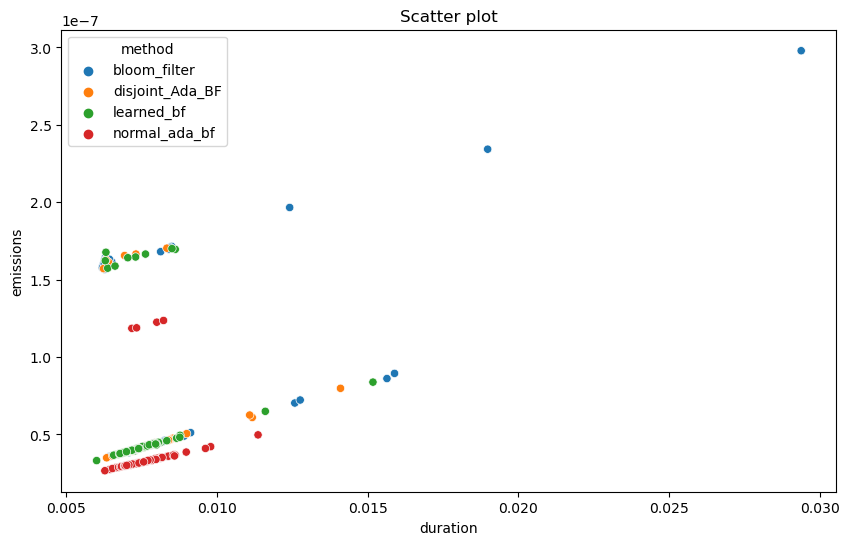

In [16]:
get_scatterplot(df_merged,'duration','emissions')

- Even though having the same duration time. Some has higher energy consumed.

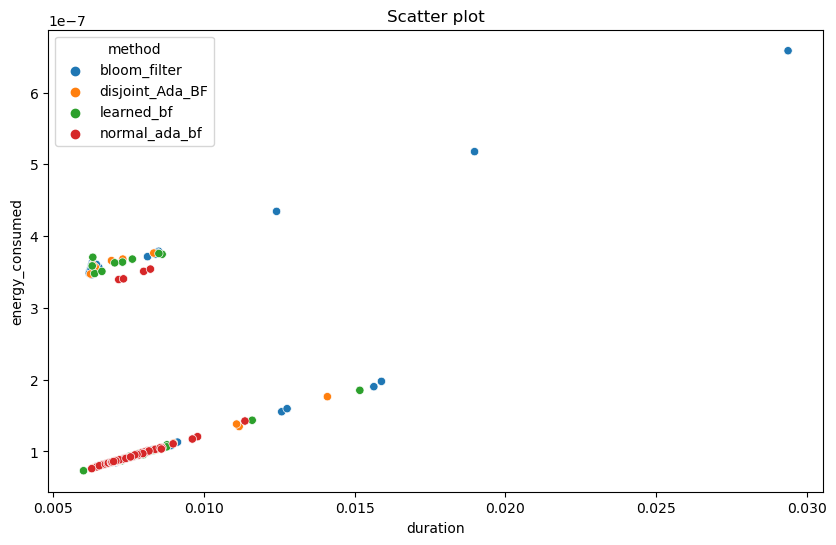

In [17]:
get_scatterplot(df_merged,'duration','energy_consumed')

- Even though having the same duration time. Some has higher energy consumed.
- This plot is indentical to the emissions one.

In [18]:
cols

['emissions',
 'emissions_rate',
 'cpu_power',
 'gpu_power',
 'cpu_energy',
 'gpu_energy',
 'ram_energy',
 'energy_consumed']

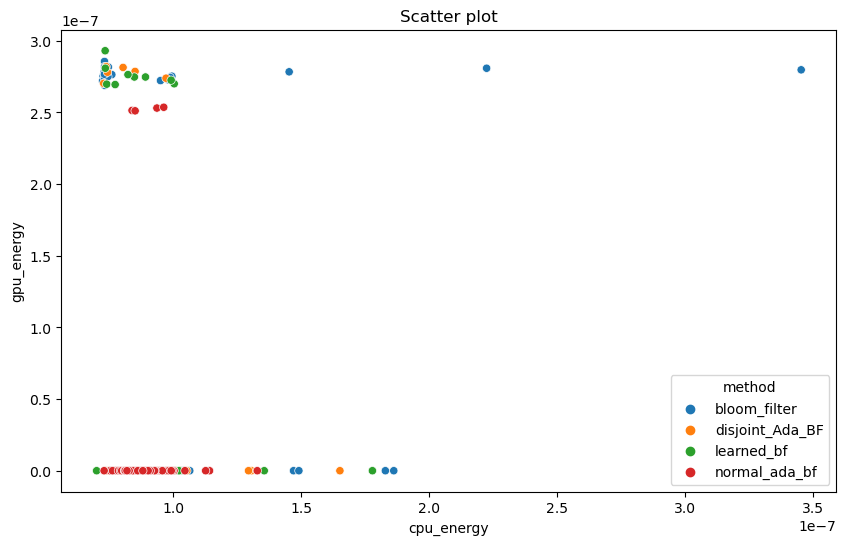

In [19]:
get_scatterplot(df_merged,'cpu_energy','gpu_energy')

- There's no clear pattern between the gpu energy and cpu energy. With same cpu energy cost, some has high gpu energy cost and some do not.

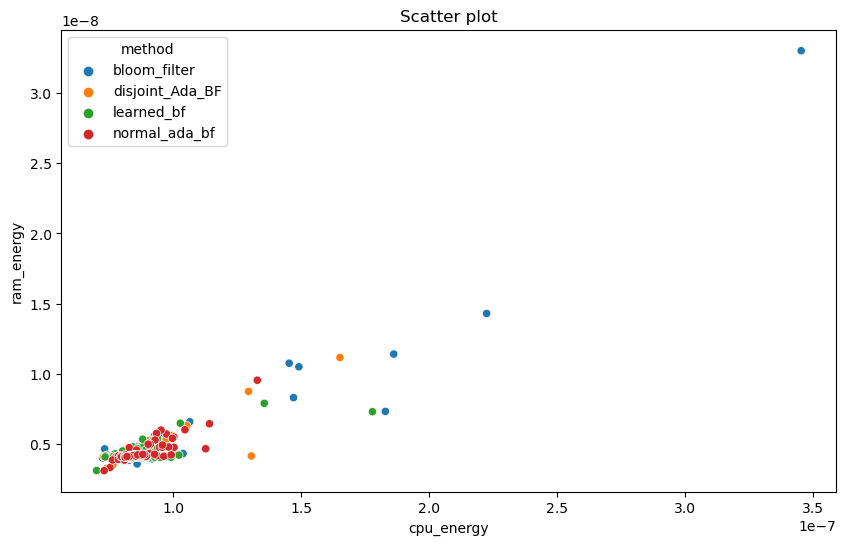

In [20]:
get_scatterplot(df_merged,'cpu_energy','ram_energy')

- There's a clear postive linear relationship between cpu energy and ram energy.

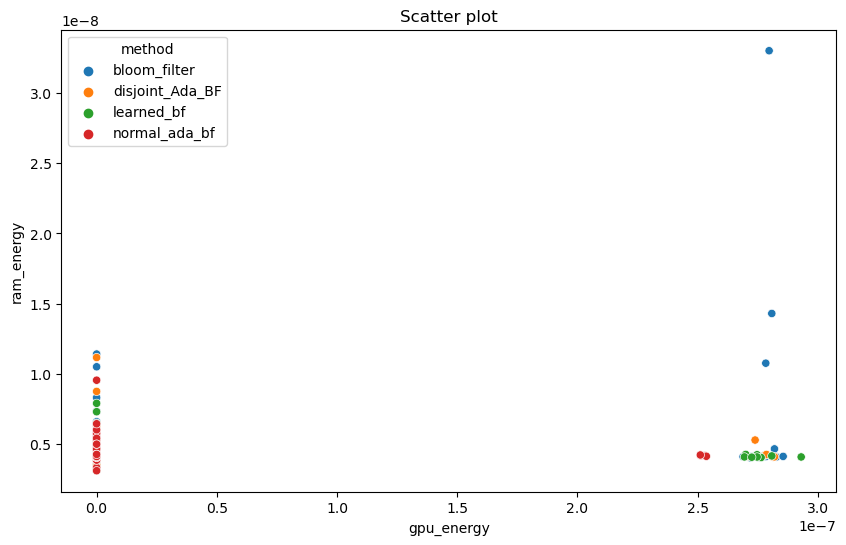

In [21]:
get_scatterplot(df_merged,'gpu_energy','ram_energy')

- There's no clear pattern

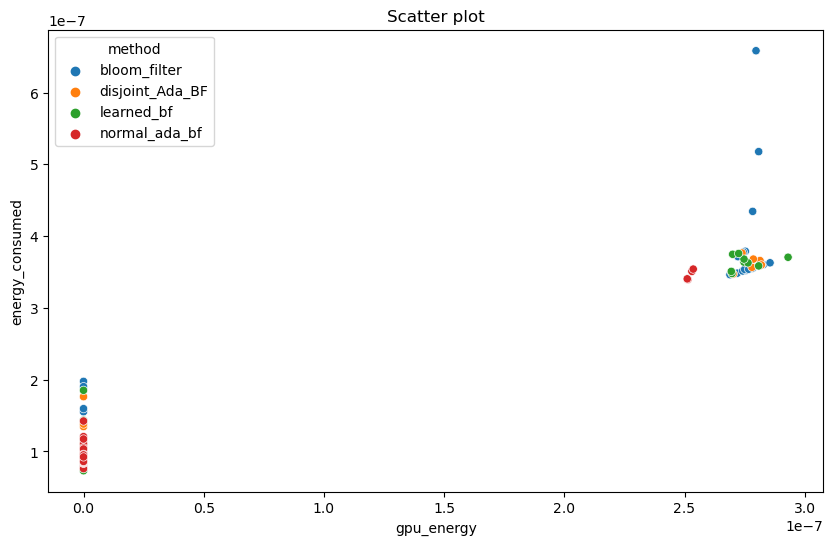

In [22]:
get_scatterplot(df_merged,'gpu_energy','energy_consumed')

- Positive assocaition

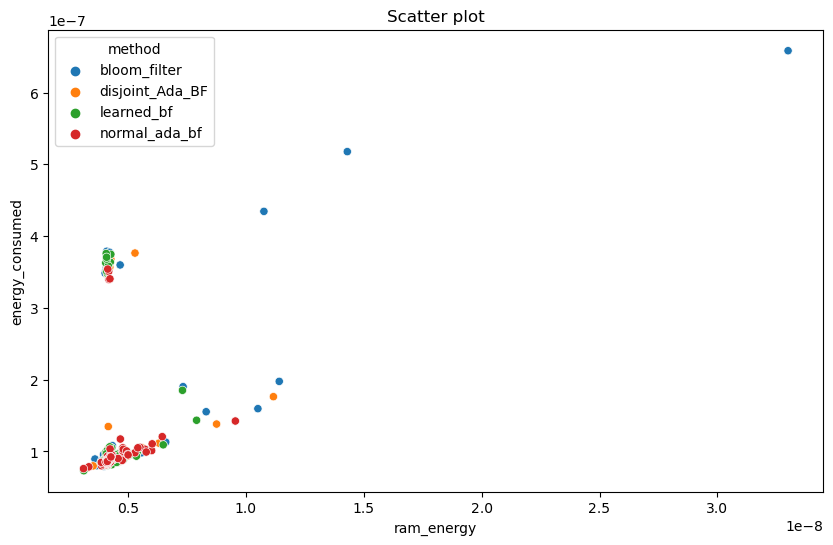

In [23]:
get_scatterplot(df_merged,'ram_energy','energy_consumed')

- Positive association

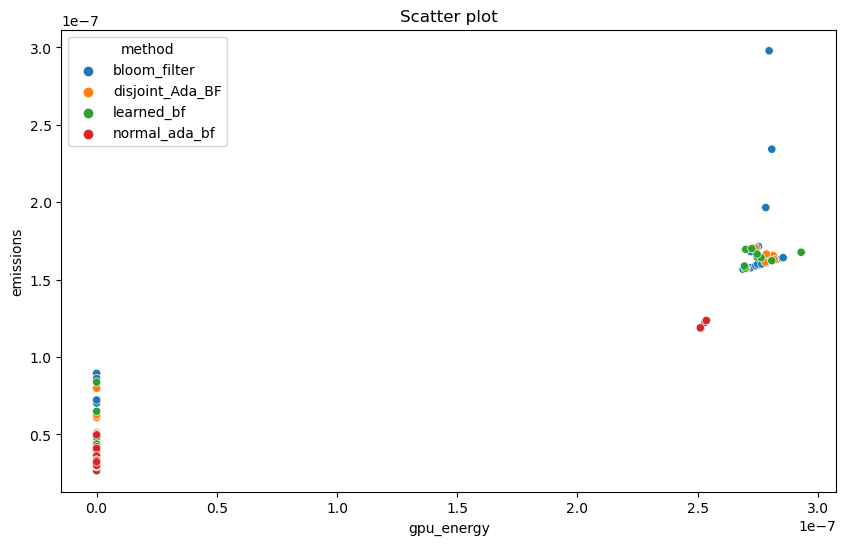

In [24]:
get_scatterplot(df_merged,'gpu_energy','emissions')

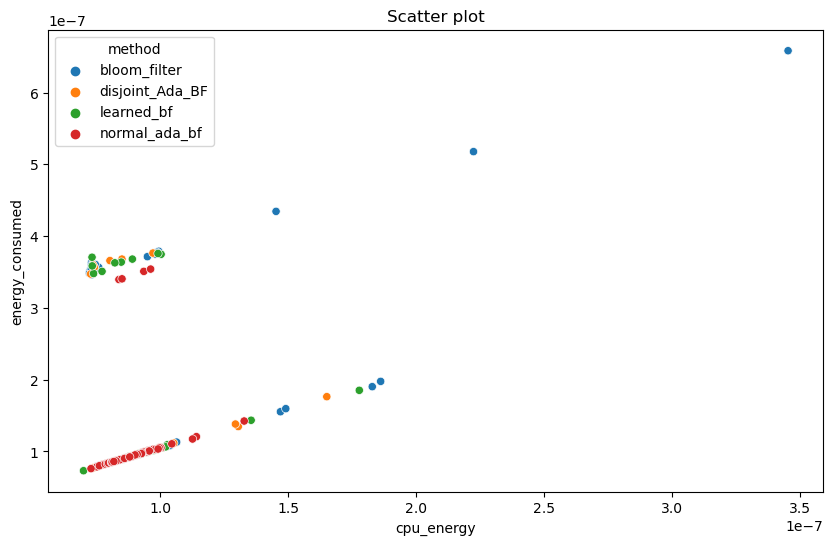

In [25]:
get_scatterplot(df_merged,'cpu_energy','energy_consumed')

- Positive association

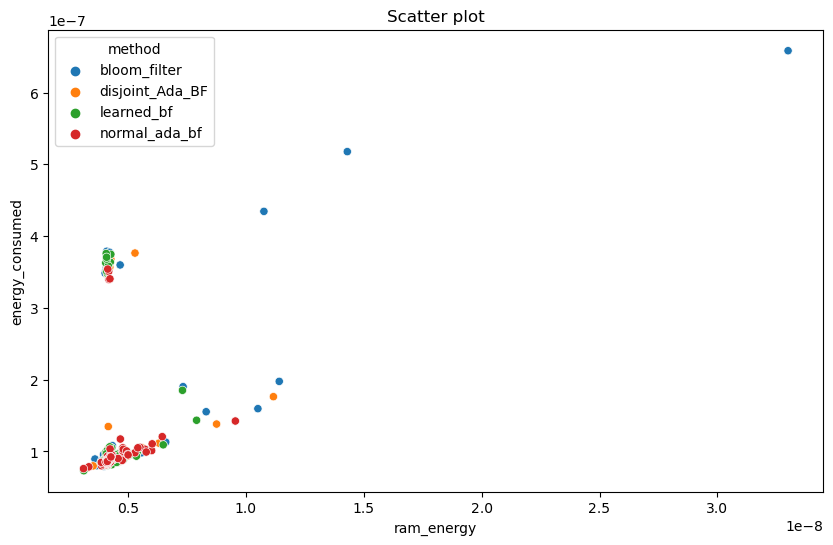

In [26]:
get_scatterplot(df_merged,'ram_energy','energy_consumed')

- psotive assocation

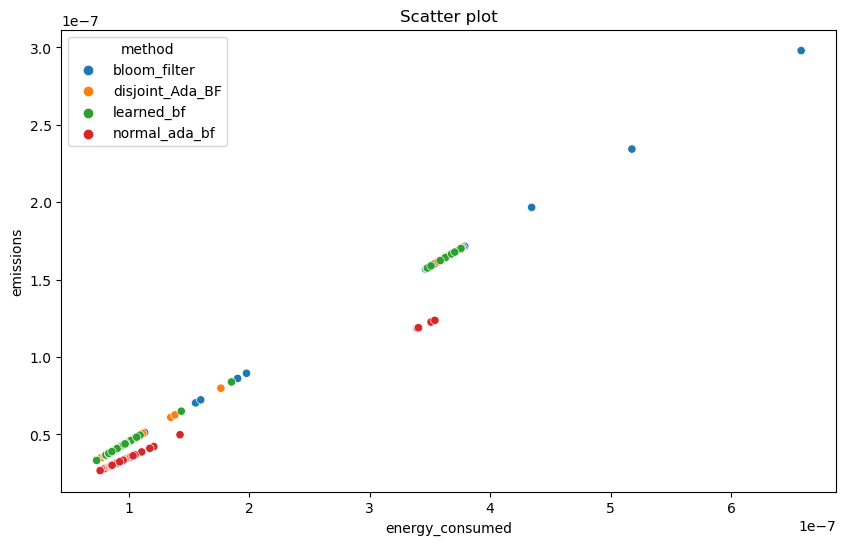

In [27]:
get_scatterplot(df_merged,'energy_consumed','emissions')

In [28]:
f_r=df_merged.head(1)
f_r

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue,time,electricity,power,method
0,2023-11-10T02:50:35,codecarbon,a38f6ca9-53c9-4b11-a071-fe9c52d360f5,0.006858,3.809221e-08,0.000006,42.5,0.0,4.754379,8.006874e-08,...,-95.8517,41.2591,12.678345,machine,N,1.0,0.013768,3.809221e-08,0.000003,bloom_filter


In [29]:
f_r['energy_consumed']

0    8.415922e-08
Name: energy_consumed, dtype: float64

In [30]:
f_r['cpu_energy']+f_r['ram_energy']+f_r['gpu_energy']

0    8.415922e-08
dtype: float64

In [31]:
f_r['energy_consumed']/f_r['emissions']

0    2.209355
dtype: float64

In [32]:
f_r['emissions']/f_r['duration']

0    0.000006
dtype: float64

In [33]:
df_merged.columns

Index(['timestamp', 'project_name', 'run_id', 'duration', 'emissions',
       'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'energy_consumed', 'country_name',
       'country_iso_code', 'region', 'cloud_provider', 'cloud_region', 'os',
       'python_version', 'codecarbon_version', 'cpu_count', 'cpu_model',
       'gpu_count', 'gpu_model', 'longitude', 'latitude', 'ram_total_size',
       'tracking_mode', 'on_cloud', 'pue', 'time', 'electricity', 'power',
       'method'],
      dtype='object')

In [34]:
df_merged['cpu_energy_percent']=df_merged['cpu_energy']/df_merged['energy_consumed']
df_merged['gpu_energy_percent']=df_merged['gpu_energy']/df_merged['energy_consumed']
df_merged['ram_energy_percent']=df_merged['ram_energy']/df_merged['energy_consumed']

In [35]:
df_merged.head()

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,tracking_mode,on_cloud,pue,time,electricity,power,method,cpu_energy_percent,gpu_energy_percent,ram_energy_percent
0,2023-11-10T02:50:35,codecarbon,a38f6ca9-53c9-4b11-a071-fe9c52d360f5,0.006858,3.809221e-08,0.000006,42.5,0.000000,4.754379,8.006874e-08,...,machine,N,1.0,0.013768,3.809221e-08,0.000003,bloom_filter,0.951396,0.000000,0.048604
1,2023-11-10T02:50:36,codecarbon,17da7cce-299d-4f64-b7a0-5dd0b1293eee,0.008400,1.697138e-07,0.000020,42.5,252.951534,4.754379,9.806007e-08,...,machine,N,1.0,0.015283,1.697138e-07,0.000011,bloom_filter,0.261523,0.727489,0.010988
2,2023-11-10T02:50:38,codecarbon,b84f587b-8c5c-4d8d-bbda-063504c1c5c8,0.007191,4.002099e-08,0.000006,42.5,0.000000,4.754379,8.391920e-08,...,machine,N,1.0,0.014129,4.002099e-08,0.000003,bloom_filter,0.949091,0.000000,0.050909
3,2023-11-10T02:50:40,codecarbon,b72582bc-ee84-49b1-9278-c8fce0a839fb,0.007439,4.117396e-08,0.000006,42.5,0.000000,4.754379,8.613716e-08,...,machine,N,1.0,0.029902,4.117396e-08,0.000001,bloom_filter,0.946896,0.000000,0.053104
4,2023-11-10T02:50:44,codecarbon,35820c19-2b79-4dc7-a1fc-dbaedb1f72c4,0.018979,2.343006e-07,0.000012,42.5,84.299724,4.754379,2.225161e-07,...,machine,N,1.0,0.059650,2.343006e-07,0.000004,bloom_filter,0.429855,0.542513,0.027632


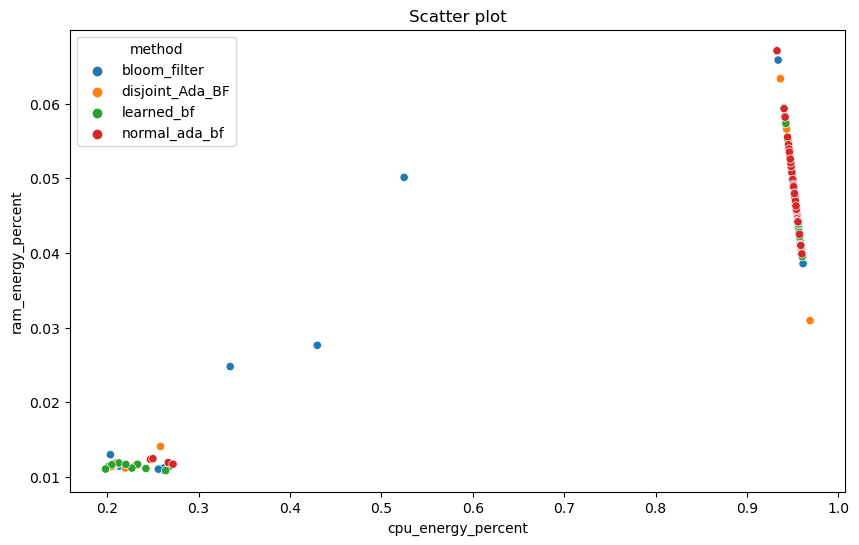

In [36]:
get_scatterplot(df_merged,'cpu_energy_percent','ram_energy_percent')

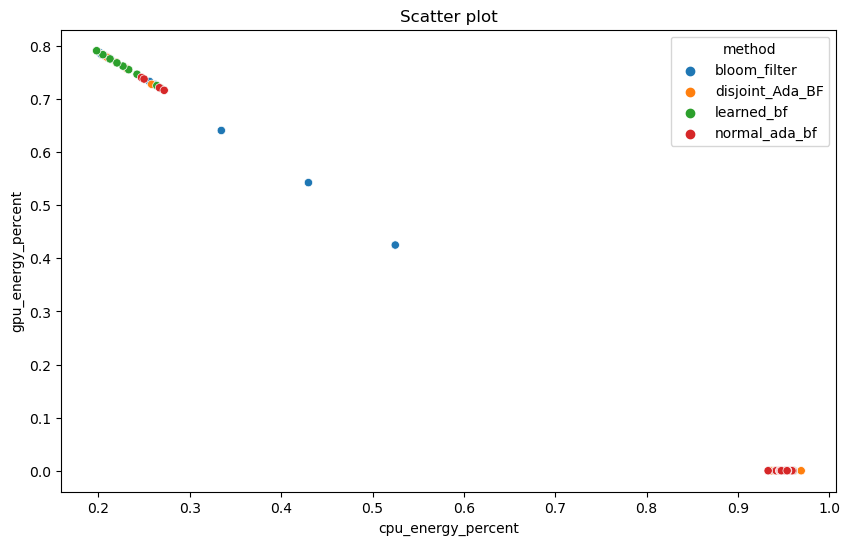

In [37]:
get_scatterplot(df_merged,'cpu_energy_percent','gpu_energy_percent')

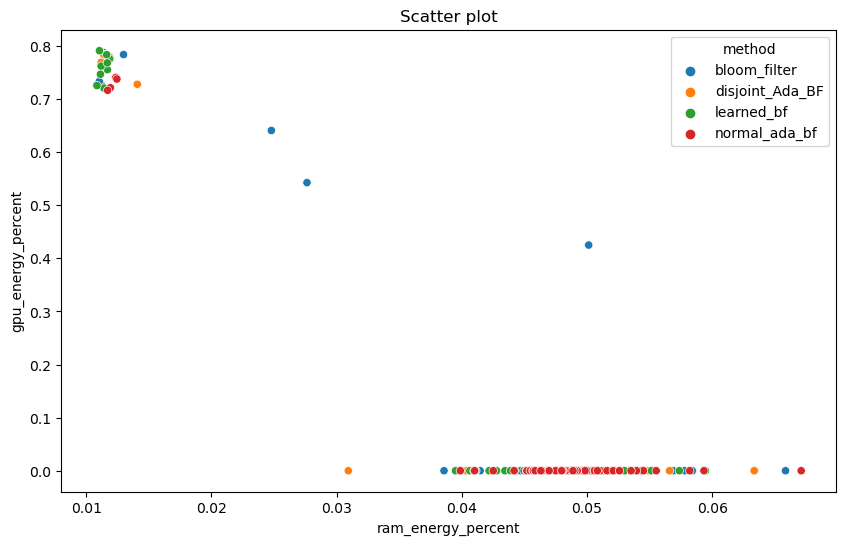

In [38]:
get_scatterplot(df_merged,'ram_energy_percent','gpu_energy_percent')

In [39]:
df_merged = df_merged.rename(columns={'time': 'total_time'})
df_merged = df_merged.rename(columns={'power': 'total_power'})
df_merged['tracking_time']=df_merged['total_time']-df_merged['duration']
df_merged['function_power']=df_merged['energy_consumed']/df_merged['duration']

In [40]:
df_merged

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,pue,total_time,electricity,total_power,method,cpu_energy_percent,gpu_energy_percent,ram_energy_percent,tracking_time,function_power
0,2023-11-10T02:50:35,codecarbon,a38f6ca9-53c9-4b11-a071-fe9c52d360f5,0.006858,3.809221e-08,0.000006,42.5,0.000000,4.754379,8.006874e-08,...,1.0,0.013768,3.809221e-08,0.000003,bloom_filter,0.951396,0.000000,0.048604,0.006910,0.000012
1,2023-11-10T02:50:36,codecarbon,17da7cce-299d-4f64-b7a0-5dd0b1293eee,0.008400,1.697138e-07,0.000020,42.5,252.951534,4.754379,9.806007e-08,...,1.0,0.015283,1.697138e-07,0.000011,bloom_filter,0.261523,0.727489,0.010988,0.006883,0.000045
2,2023-11-10T02:50:38,codecarbon,b84f587b-8c5c-4d8d-bbda-063504c1c5c8,0.007191,4.002099e-08,0.000006,42.5,0.000000,4.754379,8.391920e-08,...,1.0,0.014129,4.002099e-08,0.000003,bloom_filter,0.949091,0.000000,0.050909,0.006938,0.000012
3,2023-11-10T02:50:40,codecarbon,b72582bc-ee84-49b1-9278-c8fce0a839fb,0.007439,4.117396e-08,0.000006,42.5,0.000000,4.754379,8.613716e-08,...,1.0,0.029902,4.117396e-08,0.000001,bloom_filter,0.946896,0.000000,0.053104,0.022463,0.000012
4,2023-11-10T02:50:44,codecarbon,35820c19-2b79-4dc7-a1fc-dbaedb1f72c4,0.018979,2.343006e-07,0.000012,42.5,84.299724,4.754379,2.225161e-07,...,1.0,0.059650,2.343006e-07,0.000004,bloom_filter,0.429855,0.542513,0.027632,0.040671,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2023-11-10T09:30:35,codecarbon,372f080d-7982-4cde-bd19-e93410c629a7,0.007081,3.034645e-08,0.000004,42.5,0.000000,4.754376,8.277082e-08,...,1.0,0.021259,3.034645e-08,0.000001,normal_ada_bf,0.952525,0.000000,0.047475,0.014178,0.000012
796,2023-11-10T09:30:37,codecarbon,3646de8f-a520-4f33-bc16-d8a36ca2d581,0.007415,3.156068e-08,0.000004,42.5,0.000000,4.754376,8.612871e-08,...,1.0,0.024583,3.156068e-08,0.000001,normal_ada_bf,0.953034,0.000000,0.046966,0.017169,0.000012
797,2023-11-10T09:30:39,codecarbon,0aa51ea3-4bd2-448c-b3df-782a84188140,0.007008,3.005047e-08,0.000004,42.5,0.000000,4.754376,8.192079e-08,...,1.0,0.022076,3.005047e-08,0.000001,normal_ada_bf,0.952028,0.000000,0.047972,0.015068,0.000012
798,2023-11-10T09:30:40,codecarbon,64a02baa-5b31-4e2f-9a6c-58d3f1c12cc3,0.007712,3.325032e-08,0.000004,42.5,0.000000,4.754376,9.020434e-08,...,1.0,0.022216,3.325032e-08,0.000001,normal_ada_bf,0.947411,0.000000,0.052589,0.014504,0.000012


In [41]:
df_merged.to_csv('/Users/wangning/Desktop/cornell_repos/Bloom-Filter-Carbon-Footprint/carbon_emissions_gpu_v2.csv', index=False)